In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

## Processing dataset

In [4]:
X_max = X.max(axis=0)
X_min = X.min(axis=0)
X_scale = (X - X_min)/(X_max - X_min)
X_scale = (X - X_min)/(X_max - X_min)

print(X_scale.shape, X_scale.shape)

(100, 2) (100, 2)


# Building model

In [5]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.accuracys = []
        self.errors = []

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        self.w = np.random.rand(X_with_bias.shape[1]) * 0.01
        for _ in range(self.epochs):
            error = 0.0
            for X_i, target in zip(X_with_bias, y):
                update = self.lr * (target - self.predict(X_i))
                self.w += update * X_i
                error += int(update != 0.0)
            predicts = [self.predict(X_i) for X_i in X_with_bias]
            self.errors.append(error)
            self.accuracys.append(accuracy_score(y, predicts))
    
    def predict(self, X):
        if X.ndim == 1:
            return np.where(np.dot(X, self.w) >= 0.0, 1, -1)
        else:
            if X.shape[1] != self.w.shape[0]:
                X = np.c_[np.ones(X.shape[0]), X]
        return np.where(np.dot(X, self.w) >= 0.0, 1, -1)
    
    def evaluate(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        predictions = self.predict(X_with_bias)
        
        accuracy = accuracy_score(y, predictions)
        recall = recall_score(y, predictions, average='macro', zero_division=0)
        f1 = f1_score(y, predictions, average='macro', zero_division=0)
        precision = precision_score(y, predictions, average='macro', zero_division=0)

        # Print the metrics
        print(f"Accuracy: {accuracy}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")

## Training

In [6]:
model = Perceptron(lr=0.001, epochs=10)
model.fit(X_scale, y)

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Precision: 1.0


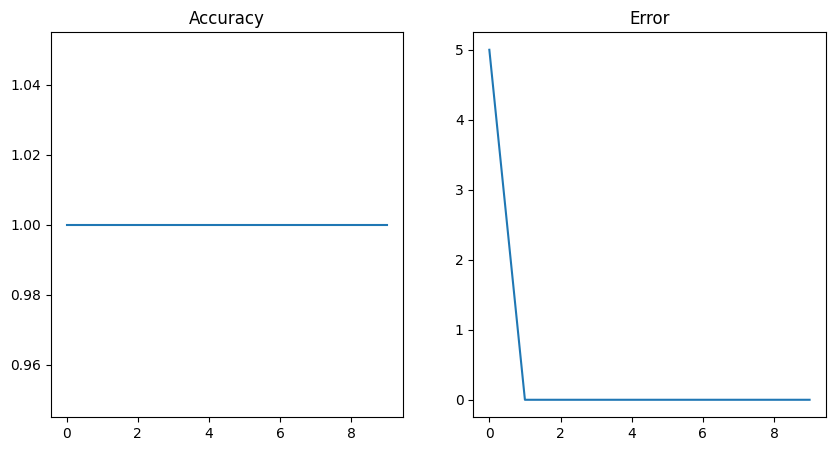

In [7]:
model.evaluate(X_scale, y)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Accuracy")
plt.plot(model.accuracys)

plt.subplot(1, 2, 2)
plt.title("Error")
plt.plot(model.errors)

Weights:  [-0.00447906  0.00287103  0.00783045]


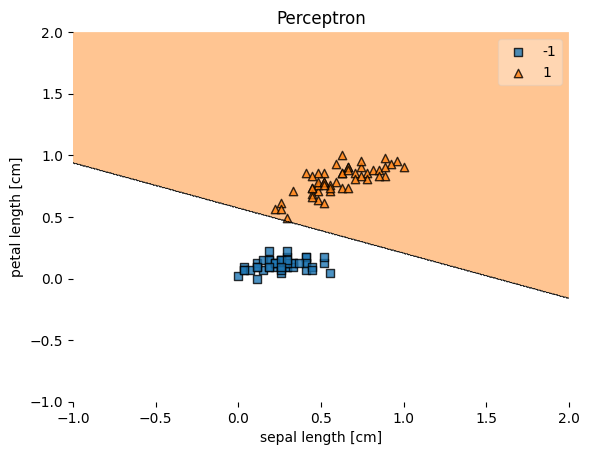

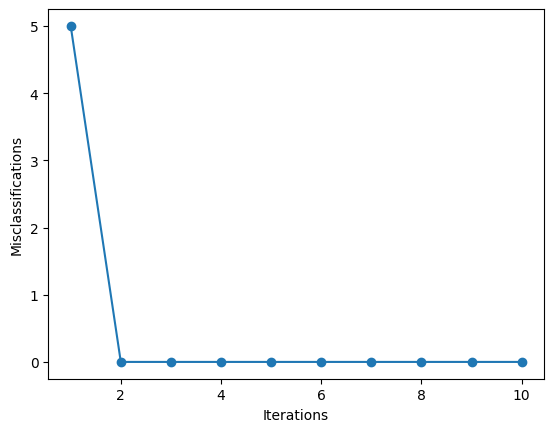

In [8]:
from mlxtend.plotting import plot_decision_regions

print('Weights: ', model.w)
plot_decision_regions(X_scale, y, clf=model)
plt.title('Perceptron')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()
plt.plot(range(1, len(model.errors)+1),
model.errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()